In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from scipy.stats import randint, uniform


from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV, 
    cross_val_score,
    cross_validate,
    train_test_split,
)

<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

The problem is a classification problem with two possible target classes, either default or not default. From the Kaggle documentation, it appears that all of the features are numerical and thus most models could be applied to the dataset. Although we might need to potentially impute any missing values and will need to scale as there are likely order of magnitude differences between the features. Overall, the features provided seem to be relevant to our goal. 

In [3]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_df = credit_df.set_index("ID")
credit_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
X_train, X_test = train_test_split(credit_df, test_size=0.3, random_state=123)

y_train = X_train['default.payment.next.month']
X_train.drop(columns=['default.payment.next.month'])

y_test = X_test['default.payment.next.month']
X_test.drop(columns=['default.payment.next.month'])

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
25666,40000.0,2,2,2,26,-1,0,0,0,-1,...,13600.0,0.0,44024.0,18697.0,1300.0,1000.0,0.0,22373.0,680.0,10000.0
16465,80000.0,2,3,1,59,0,0,0,0,0,...,53169.0,50875.0,50372.0,49470.0,3212.0,2106.0,2000.0,1603.0,1903.0,2006.0
22387,170000.0,2,1,2,30,2,2,2,2,2,...,161487.0,157577.0,168094.0,170922.0,6800.0,6500.0,0.0,13000.0,5500.0,1000.0
10150,200000.0,2,2,1,41,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,742.0,0.0,0.0,0.0,0.0,0.0
8730,50000.0,1,2,1,43,0,0,0,0,0,...,9044.0,9225.0,9417.0,9617.0,1140.0,1150.0,331.0,341.0,356.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,60000.0,2,2,1,48,0,0,0,0,0,...,51874.0,51808.0,16941.0,17295.0,2000.0,2100.0,1400.0,600.0,1000.0,1000.0
11460,310000.0,1,2,1,43,-1,-1,-1,-1,-1,...,2060.0,2004.0,2503.0,814.0,2691.0,2060.0,2018.0,2505.0,816.0,3052.0
6609,10000.0,2,2,2,22,0,0,0,0,0,...,8144.0,8861.0,10104.0,9803.0,1284.0,1283.0,1000.0,1535.0,0.0,1000.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

Lets see if there are any missing values in the dataset.

In [5]:
credit_df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

The dataset has no missing values. Now, looking closer at the features we can observe the following:

- The education features has some issues. It can be seen as ordinal, but currently it is ordered in the opposite direction with higher numbers given to lower education (graduate school = 1, university = 2, high school = 3). It also has some duplicate value issue with unknown = 5 and unknown = 6. Both of these need to be dealt with
- PAY_0 (payment status in september which is the current month) and months closer to now, is likely more important in predicting the default status next month. A person who has not paid for a couple of months already is more likely to default again. This feature importance could potentially be explored using decision trees.
- The relationship between PAY_AMNTK and BILL_AMNTK could be useful. Logically, the clients that default are likely to only have been a paying a small percentage of their bill statements in the last couple of months
- The trend of PAY_K and BILL_AMNTK (the payment status in a specific month and the bill statement in a specific month) could logically be a strong predictor of defaulting. Someone who is not paying already and has an increasing bill statement for the last couple of months is likely to not pay next month. 

To investigate the relationship between PAY_AMNTK and BILL_AMNTK, we can measure the average percentage of bill statement payments (average bill to payment ratio) made by the defaulters and non-defaulters.

In [6]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_cols  = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

credit_df['pay_ratio'] = (credit_df[pay_cols].sum(axis=1) / (credit_df[bill_cols].sum(axis=1) + 1e-6)) # small addition to avoid 0 division

# We need to filter out the extreme outliers where a person with very low statment ends up overpaying by a lot
# otherwise this payment would dominate the mean
credit_df_filtered = credit_df[(credit_df['pay_ratio'] > 0) & (credit_df['pay_ratio'] < 5)]

credit_df_filtered.groupby('default.payment.next.month')['pay_ratio'].mean()

default.payment.next.month
0    0.390469
1    0.277503
Name: pay_ratio, dtype: float64

From this statistic, we can see that a client who defaults pays, on average, 12 percent less per month towards their bill statement than a client who does not default. To get a clearer picture, we can visualize the payment to bill ratio and default status using a histogram. 

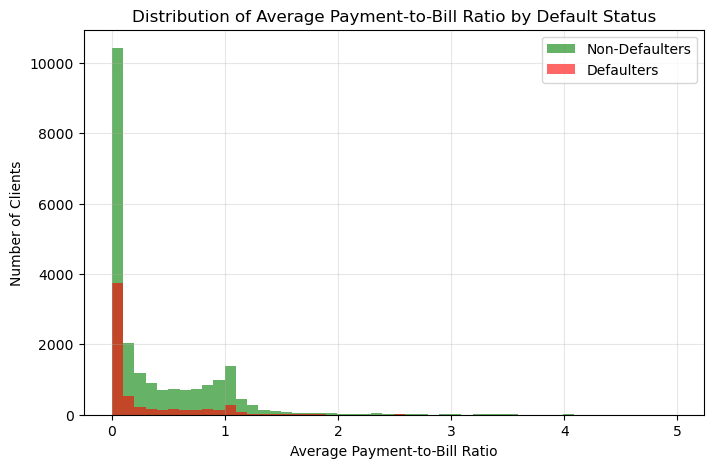

In [7]:
pay_ratio_non_default = credit_df_filtered[credit_df_filtered['default.payment.next.month']==0]['pay_ratio']
pay_ratio_default = credit_df_filtered[credit_df_filtered['default.payment.next.month']==1]['pay_ratio']

plt.figure(figsize=(8,5))
plt.hist(pay_ratio_non_default, bins=50, alpha=0.6, color='green', label='Non-Defaulters')
plt.hist(pay_ratio_default, bins=50, alpha=0.6, color='red', label='Defaulters')

plt.xlabel('Average Payment-to-Bill Ratio')
plt.ylabel('Number of Clients')
plt.title('Distribution of Average Payment-to-Bill Ratio by Default Status')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


The histogram shows that most clients have average payment to bill ratios aroud 0, but the ratios greater than that are usually clients who do not default. Although there is class imbalance, the histogram shows that clients who default cluster near 0 payment to bill ratio. This suggests that the average payment to bill statement ratio could be a valuable feature for our goal.

To investigate the trend of PAY_K and AMNT_K, we can calculate the average monthly change in bill amount 

In [8]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
credit_df['bill_trend'] = credit_df[bill_cols].iloc[:, ::-1].diff(axis=1).mean(axis=1)
credit_df.groupby('default.payment.next.month')['bill_trend'].mean()

default.payment.next.month
0    2590.391714
1    2047.545359
Name: bill_trend, dtype: float64

It appears that on average, the people who default next month have lower increase in bill statement by 500 NT dollars in the last couple of months than those who do not default. This leads to the question that perhaps those with a higher credit limit (who ar able to add more to the bill statement each month) are less likely to default. This would make sense as higher credit is usually given to those with higher salaries and a long record of always paying on time. We can investigate this by visualizing the relationship between credit limit and default status. We will do this using a histogram which will show us the distribution of the credit limit and the default status using color coding.

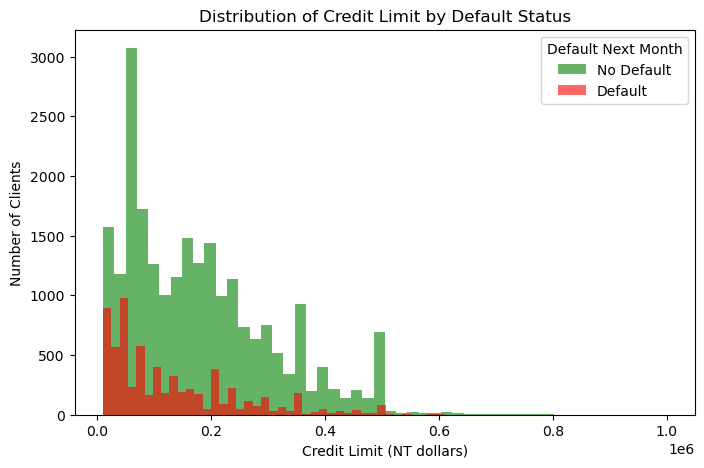

In [9]:
defaulted = credit_df[credit_df['default.payment.next.month'] == 1]['LIMIT_BAL']
non_defaulted = credit_df[credit_df['default.payment.next.month'] == 0]['LIMIT_BAL']

plt.figure(figsize=(8,5))
plt.hist(non_defaulted, bins=50, alpha=0.6, color='green', label='No Default')
plt.hist(defaulted, bins=50, alpha=0.6, color='red', label='Default')

plt.title('Distribution of Credit Limit by Default Status')
plt.xlabel('Credit Limit (NT dollars)')
plt.ylabel('Number of Clients')
plt.legend(title='Default Next Month')
plt.show()


The histogram shows a clear trend, that the clients who default next month tend to have lower credit limits than those who do not default. Thus, the credit limit could be an important feature in predicting whether a client defaults or not.

To decide which evaluation metrics to use, we must check for potential class imbalance in the dataset. We will do this on the entire dataset to get a clear idea.

In [10]:
class_counts = credit_df.groupby("default.payment.next.month").size()
class_counts

class_prop = credit_df.groupby("default.payment.next.month").size() / len(credit_df) * 100
class_prop

class_imbalance = pd.DataFrame({"counts" : class_counts, "proportion" : class_prop})
class_imbalance

,counts,proportion
default.payment.next.month,,
0,23364,77.88
1,6636,22.12


There is a clear class imbalance in this dataset and we cannot use accuracy as our metric. To better judge our models, given the imbalance, we must use precision, recall, and f1 score as our metrics. Since our goal is to predict whether a person will default, and as there are less cases of a person defaulting, we will take the class where the person does default as the "positive" class. We will use f1-score for hyperparameter optimizing where necessary. Between precision and recall, recall is more important in this case as we need to identify as many defaulters as possible. However, precision is still important as we don't want to have too many false positives.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

As discussed in the EDA section, one useful feature that can be added is the average payment to bill ratio.

In [11]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_cols  = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

X_train['pay_ratio'] = (X_train[pay_cols].sum(axis=1) / (X_train[bill_cols].sum(axis=1) + 1e-6))
X_test['pay_ratio'] = (X_test[pay_cols].sum(axis=1) / (X_test[bill_cols].sum(axis=1) + 1e-6))

X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,pay_ratio
ID,,,,,,,,,,,,,,,,,,,,,
16396,320000.0,2,1,2,36,0,0,0,0,0,...,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0,0.176415
21449,440000.0,2,1,2,30,-1,-1,-1,0,0,...,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0,0.544084
20035,160000.0,2,3,1,44,-2,-2,-2,-2,-2,...,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.000000
25756,120000.0,2,2,1,30,0,0,0,0,0,...,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0,0.037944
1439,50000.0,1,2,2,54,1,2,0,0,0,...,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0,0.032182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28637,380000.0,2,2,1,37,0,0,0,0,0,...,15949.0,15556.0,1204.0,1300.0,1242.0,1900.0,0.0,3000.0,0,0.099529
17731,360000.0,2,1,1,54,1,-2,-2,-1,0,...,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0,0,0.786794
28031,50000.0,2,3,1,29,0,0,0,0,0,...,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0,1,0.036011


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

Since there are no missing values in the dataset, there is no need for imputation on any features. 

We have the following ordinal features: education and PAY_* (all of the repayment status columns). We need to fix the ordering issues of the education column, by switching the order so higher education has a higher value (i.e Graduate School = 3, University = 2...) and also remove the duplicate value for "unkown". The same does not need to happen to PAY_* as it has meaning in its order, with higher numbers given to more months of missed payments. We don't need to scale these features, as once the other features that need to be scaled are scaled, the order of magnitude difference will not be large enough to have serious effects (these features already have values close to 0).

In [12]:
# First we need to fix the education feature
education_map = {
    0: 0,   # invalid 0s in dataset
    1: 3,   # graduate school = 3
    2: 2,   # university = 2
    3: 1,   # high school = 1
    4: 0,   # others = 0
    5: 0,  # unknown will be lumped with others (less noise)
    6: 0   
}

X_train['EDUCATION'] = X_train['EDUCATION'].map(education_map).astype(int)

# This transformation is just a rule and doesn't learn anything from the test set
X_test['EDUCATION'] = X_test['EDUCATION'].map(education_map).astype(int)

# Now we can outline the ordinal features
Ordinal_features = ['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

These features are already ordinal encoded so we won't need to apply the ordinal encoder transformer.

We have the following categorical features: marriage and sex. Both will require one-hot encoding as they have no ordinality. Although, since sex is a binary feature for this dataset, we will treat it as binary and have one binary column for it (to avoid mirror columns).

In [13]:
Binary_features = ['SEX']
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)


Categorical_features = ['MARRIAGE']
categorical_transformer = OneHotEncoder(sparse_output=True)


We have the following numeric features that all need to be scaled: LIMIT_BAL, AGE, BILL_AMNT*, PAY_AMNT*

In [14]:
Numeric_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 
                    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'pay_ratio']

numeric_transformer = StandardScaler()

We will now need to create a column transformer to apply the necessary transformation to the features

In [15]:
preprocessor = make_column_transformer((numeric_transformer, Numeric_features),
                                       (binary_transformer, Binary_features),
                                       (categorical_transformer, Categorical_features),
                                       ('passthrough', Ordinal_features),
                                       verbose_feature_names_out=False)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [16]:
dummy_pipeline = make_pipeline(preprocessor, DummyClassifier())
dummy_pipeline.fit(X_train, y_train)

# no real need to cross validate a dummy classifier (prediction does not depend on features)
test_acc = dummy_pipeline.score(X_test, y_test)
y_pred = dummy_pipeline.predict(X_test)


recall = recall_score(y_pred= y_pred, y_true= y_test)
precision = precision_score(y_pred= y_pred, y_true= y_test, zero_division=0) # division by zero occuring so needed to use this parameter
f1 = f1_score(y_pred=y_pred, y_true= y_test)

result_dict = {"accuracy" : test_acc,
               "recall" : recall,
               "precision" : precision,
               "f1" : f1}

result_df = pd.DataFrame([result_dict])
result_df

,accuracy,recall,precision,f1
0,0.783556,0.0,0.0,0.0


Although the accuracy is high for a dummy classifier, the precision, recall, and f1 reveal that the model reveal the truth. The model is just predicting everyone as not defaulting because that is the most common class in the dataset. Leading to zero values for the metrics.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

We will use Logistic regression model as this is a classification problem. We will use GridSearchCV to find the best value for the hyperparameter C. We will evaluate using F1 score as it is a singular value that encompasses both precision and recall.

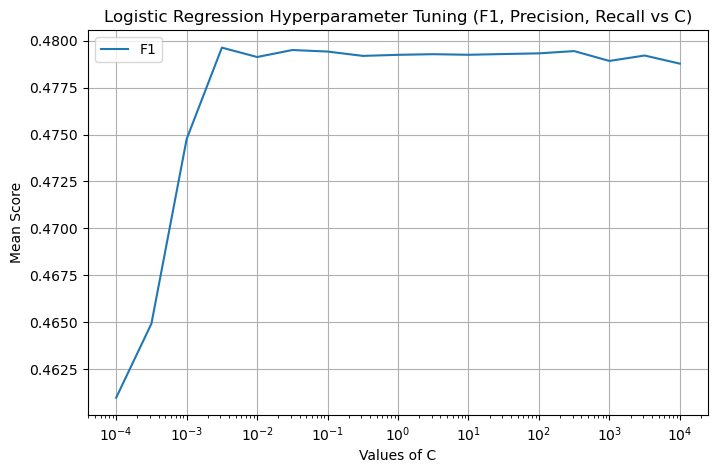

Best Parameters: {'logisticregression__C': np.float64(0.0031622776601683794)}
Best F1 Score: 0.4796259183941717
Precision at Best C: 0.38447240569853475
Recall at Best C: 0.6377942578614778


In [17]:
param_grid = {
    "logisticregression__C": 10.0 ** np.arange(-4, 4.5, 0.5)
}

# Define scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

# Build pipeline
logistic_pipe = make_pipeline(
    preprocessor,
    LogisticRegression(class_weight='balanced', max_iter=1000)
)

# Grid search using multiple metrics
grid = GridSearchCV(
    logistic_pipe,
    param_grid,
    cv=5,
    scoring=scoring,
    refit='f1',  # Refit the best model based on F1
    n_jobs=-1
)

# Fit grid search
grid.fit(X_train, y_train)

# Extract results
results = pd.DataFrame(grid.cv_results_)

# Plot F1 vs C
plt.figure(figsize=(8, 5))
plt.plot(results["param_logisticregression__C"], results["mean_test_f1"], label="F1")
plt.xscale("log")
plt.xlabel("Values of C")
plt.ylabel("Mean Score")
plt.title("Logistic Regression Hyperparameter Tuning (F1, Precision, Recall vs C)")
plt.legend()
plt.grid(True)
plt.show()

# Print best parameters and metrics
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

# Retrieve precision and recall of best model
best_idx = grid.best_index_
print("Precision at Best C:", results.loc[best_idx, 'mean_test_precision'])
print("Recall at Best C:", results.loc[best_idx, 'mean_test_recall'])

Here are the standard deviations of the test scores (in descending order).

In [18]:
summary = results[
    [
        "param_logisticregression__C",
        "mean_test_f1",
        "std_test_f1",
        "mean_test_precision",
        "std_test_precision",
        "mean_test_recall",
        "std_test_recall"
    ]
]
print(summary.sort_values(by="mean_test_f1", ascending=False))

    param_logisticregression__C  mean_test_f1  std_test_f1  \
3                      0.003162      0.479626     0.007025   
5                      0.031623      0.479498     0.006308   
13                   316.227766      0.479441     0.005419   
6                      0.100000      0.479417     0.006079   
12                   100.000000      0.479321     0.005714   
11                    31.622777      0.479285     0.005629   
9                      3.162278      0.479276     0.005756   
10                    10.000000      0.479245     0.005597   
8                      1.000000      0.479242     0.005683   
15                  3162.277660      0.479206     0.005575   
7                      0.316228      0.479186     0.005796   
4                      0.010000      0.479126     0.005256   
14                  1000.000000      0.478917     0.005975   
16                 10000.000000      0.478773     0.005559   
2                      0.001000      0.474762     0.004412   
1       

From our search, we have determined that the best value for the hyperparameter C is 0.003162. This yields an f1-score of 0.4796 with a standard deviation of 0.007025, a precision score of 0.3844 and a recall score of 0.6378. Which is far better than the baseline model. Although the precision is low, the recall is fairly high, this shows that the model is actually learning to identify some defaulters correctly.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

We will be using the following models: Random Forest Classifier, Gradient Boosted Classifier, and SVM with RBF kernal

In [19]:
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123),
    "SVM": SVC(class_weight='balanced', random_state=123)
}

scoring = {
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

results = []

# Run cross-validation
for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    
    cv_results = cross_validate(
        pipe, X_train, y_train,
        cv=5, scoring=scoring,   # We will score based on f1, but also get precision and recall metrics
        return_train_score=True,
        n_jobs=-1
    )

    results.append({
        "Model": name,
        "Train F1 Mean": cv_results['train_f1'].mean(),
        "Test F1 Mean": cv_results['test_f1'].mean(),
        "Test Precision Mean": cv_results['test_precision'].mean(),
        "Test Recall Mean": cv_results['test_recall'].mean(),
        "Fit Time (s)": cv_results['fit_time'].mean(),
        "Score Time (s)": cv_results['score_time'].mean()
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="Test F1 Mean", ascending=False, inplace=True)
display(results_df)


,Model,Train F1 Mean,Test F1 Mean,Test Precision Mean,Test Recall Mean,Fit Time (s),Score Time (s)
2,SVM,0.559748,0.540993,0.507964,0.578922,35.089881,9.410531
1,Gradient Boosting,0.502904,0.480664,0.678553,0.372225,12.067402,0.039218
0,Random Forest,0.998509,0.453978,0.658971,0.346416,8.473684,0.139343


From the above dataframe we can see that Random Forest Classifier is overfitting while the other two models are not overfitting or underfitting. Although this is characteristic of this classifier, it is doing it by a large margin here. Additionally, the mean test f1-score for random forest is also the lowest amongst all the models including the logistic model. Both SVM and Gradient Boosting show better generalization with test f1-scores larger than the highest mean test f1-score achieved by the logistic model. SVM with RBF kernal achieves the highest test f1-score, but it also took the longest time to fit and score. Although, the models have their test f1-scores very close to the best f1-score by the logistic model, these three models have not been hyperparameter optimized, and their test f1-scores could improve. The mean test f1 standard deviations are of the same size for the three models and are larger than the standard deviation for best logistic model, but not by a very large amount.

The problem with these three models is that the recalls are all lower than the best recall given by logistic model. Only SVM achieves a recall even close to the logistic model. Although they all have higher precision than the logistic model, our goal is to identify defaulters and recall is more important than precision. Therefore, at this point, the logistic model is still a better choice for detecting defaulting in this context.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

We will carry out feature feature selection using RFECV on the logitistic model.

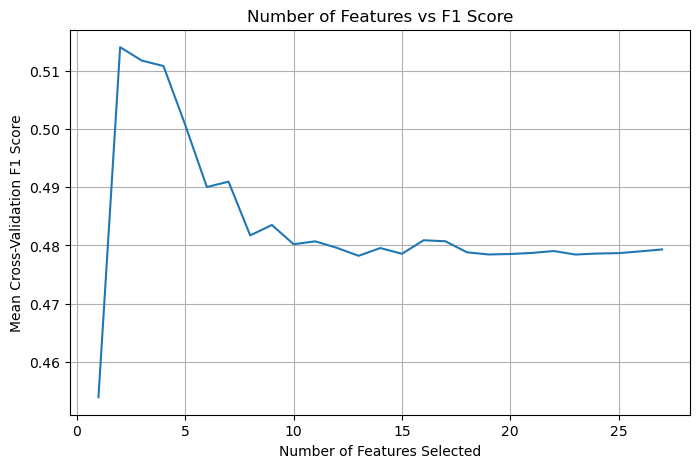

Optimal number of features: 2
Selected features:
MARRIAGE_0
PAY_0


In [20]:
log_regression = LogisticRegression(class_weight='balanced', random_state=123)

rfecv = RFECV(
    estimator=log_regression,
    step=1,
    cv=StratifiedKFold(5), # keep it balanced
    scoring='f1',
    n_jobs=-1
)

rfecv_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', rfecv)
])


rfecv_pipe.fit(X_train, y_train)

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    rfecv.cv_results_['mean_test_score']
)
plt.xlabel("Number of Features Selected")
plt.ylabel("Mean Cross-Validation F1 Score")
plt.title("Number of Features vs F1 Score")
plt.grid(True)
plt.show()

feature_names = preprocessor.get_feature_names_out()

selected_features = feature_names[rfecv.support_]

print(f"Optimal number of features: {rfecv.n_features_}")
print("Selected features:")
for f in selected_features:
    print(f)

This is a drastic decrease in number of features. Lets train the logistic model with these features and compare it to the best logistic model we got before.

In [21]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
X_train_selected = rfecv.transform(X_train_proc)
X_test_selected = rfecv.transform(X_test_proc)

logistic_selected = LogisticRegression(class_weight='balanced', random_state=123)
logistic_selected.fit(X_train_selected, y_train)

y_pred_selected = logistic_selected.predict(X_test_selected)

precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

print(f"Precision (selected): {precision_selected:.4f}")
print(f"Recall (selected): {recall_selected:.4f}")
print(f"F1 (selected): {f1_selected:.4f}")

Precision (selected): 0.4866
Recall (selected): 0.5139
F1 (selected): 0.4999


Compared to the best logistic model we got before, the following has occured:
- F1 score improved: 0.4796 -> 0.4999
- Precision increased: 0.3845 -> 0.4866 the model makes fewer false positive predictions.
- Recall decreased: 0.6378 -> 0.5139  the model catches fewer defaulters

Although the feature selection has given us a more balanced model with higher precision and f1, the recall has dropped. Since recall is the most important in this case, we should not keep feature selection.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

In [22]:
# We need to use randomized search because grid is taking way too long
model_distributions = {
    "Random Forest": (RandomForestClassifier(class_weight='balanced', random_state=123), {
        "randomforestclassifier__n_estimators": randint(50, 200),
        "randomforestclassifier__max_depth": randint(5, 20),
        "randomforestclassifier__max_features": ["sqrt", "log2", None]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=123), {
        "gradientboostingclassifier__n_estimators": randint(50, 200),
        "gradientboostingclassifier__learning_rate": uniform(0.01, 0.09)
    }),
    "SVM": (SVC(class_weight='balanced', random_state=123), {
        "svc__C": uniform(0.1, 10),
        "svc__gamma": ["scale", 0.01, 0.1, 1]
    })
}

scoring = {"f1": "f1", "precision": "precision", "recall": "recall"}
optimized_results = []

for name, (model, param_dist) in model_distributions.items():
    pipe = make_pipeline(preprocessor, model)
    
    search = RandomizedSearchCV(pipe, param_distributions=param_dist,
                                n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=123)
    search.fit(X_train, y_train)
    
    # Evaluate best estimator for all metrics
    cv_results = cross_validate(search.best_estimator_, X_train, y_train,
                                cv=3, scoring=scoring, return_train_score=True, n_jobs=-1)
    
    optimized_results.append({
        "Model": name,
        "Train F1 Mean": cv_results['train_f1'].mean(),
        "Test F1 Mean": cv_results['test_f1'].mean(),
        "Test F1 Std": cv_results['test_f1'].std(),
        "Test Precision Mean": cv_results['test_precision'].mean(),
        "Test Recall Mean": cv_results['test_recall'].mean(),
        "Fit Time (s)": cv_results['fit_time'].mean(),
        "Score Time (s)": cv_results['score_time'].mean(),
        "Best Params": search.best_params_
    })

optimized_results_df = pd.DataFrame(optimized_results)
optimized_results_df.sort_values(by="Test F1 Mean", ascending=False, inplace=True)
display(optimized_results_df)

,Model,Train F1 Mean,Test F1 Mean,Test F1 Std,Test Precision Mean,Test Recall Mean,Fit Time (s),Score Time (s),Best Params
0,Random Forest,0.563191,0.545517,0.007811,0.502246,0.597054,1.542186,0.040607,"{'randomforestclassifier__max_depth': 5, 'rand..."
2,SVM,0.555507,0.537385,0.010530,0.500329,0.580416,17.614804,8.680932,"{'svc__C': 6.373170093376166, 'svc__gamma': 0.01}"
1,Gradient Boosting,0.512845,0.476906,0.004024,0.672087,0.369668,10.983737,0.032112,{'gradientboostingclassifier__learning_rate': ...


After hyperparameter optimization, we can see:
- Random Forest achieved the highest f1-score (0.546) and recall (0.597) among the three, with the fastest training and scoring times. This indicates it generalizes well while effectively identifying defaulters.
- SVM had a similar f1-score to Random Forest (0.537) and also a similar recall (0.580), but training and scoring times were significantly slower. Due to its recall, its is still effective at identifying defaulters
- Gradient Boosting showed high precision (0.672) but lower f1-score (0.477) and recall (0.370), meaning it predicts defaulters less often but is more confident when it does.

Overall, Random Forest balances recall, F1, and computational efficiency, SVM prioritizes recall at the cost of time, and Gradient Boosting favors precision but misses many defaulters. Hyperparameter optimization improved all models' performances from before, but the best choice is Random Forest due to it having the best recall and computing times

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

In [23]:
...

Ellipsis

In [24]:
...

Ellipsis

In [25]:
...

Ellipsis

In [26]:
...

Ellipsis

In [27]:
...

Ellipsis

In [28]:
...

Ellipsis

In [29]:
...

Ellipsis

In [30]:
...

Ellipsis

In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [33]:
...

Ellipsis

In [34]:
...

Ellipsis

In [35]:
...

Ellipsis

In [36]:
...

Ellipsis

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)